<a href="https://colab.research.google.com/github/FerdiErs/Portofolio/blob/main/Analisis_Sentimen_menggunakan_RF%2C_SVM%2C_Naive_Bayes%2C_dan_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Sentimen menggunakan RF, SVM, Naive Bayes, dan Logistic Regression

In [ ]:
### Import Library 
import numpy as np 
import pandas as pd
import seaborn as sns 

In [ ]:
### Input Data set
url = "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv"
df = pd.read_csv(url)
df.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [ ]:
df.rename(columns={'Text Tweet':'text_tweet'},inplace=True)
df.head()

,Id,Sentiment,text_tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


In [ ]:
from sklearn.preprocessing import LabelEncoder 

X = df.iloc[:,2].values 
Le = LabelEncoder()
Le.fit(['positive','negative']) 

y = Le.transform(df.iloc[:,1].values)

print(list(Le.classes_))

['negative', 'positive']


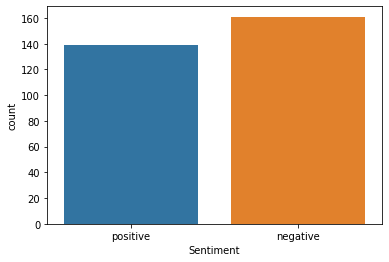

In [ ]:
### Explorasi data 
sns.countplot(x='Sentiment', data = df)


In [ ]:
df['Sentiment'].value_counts()

negative    161
positive    139
Name: Sentiment, dtype: int64

In [ ]:
import requests
import re

In [ ]:
### menghilangkan stopwords 

url = "https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt" 
ina_stopword = requests.get(url).content 

stop_list = [] 
for tempstp in ina_stopword.split():
  stop_list.append(tempstp)

In [ ]:
### menghapus special character dan stopword 
clean_text = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+" 

def preproses(text_tweet):
  text_tweet = re.sub(clean_text,'',str(text_tweet).lower()).strip()
  tokens = []
  for token in text_tweet.split():
    if token not in stop_list:
      tokens.append(token) 
  return ''.join(tokens)

In [ ]:
df['clean_twt'] = df.text_tweet.apply(lambda x: preproses(x))

In [ ]:
df

,Id,Sentiment,text_tweet,clean_twt
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention>#boikot_<provider_name>gunakanpr...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinyabaliklagi,alhamdulillah:v<provider_name>"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamatpagi<provider_name>bisabantukenapadidal...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear<provider_name>akhir2inijaringandatalemotb...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamatmalampendusta<provider_name>
...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...","pantesanlancarya,sinyal<provider_name>yang4gla..."
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillahlancarpakai<provider_name>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...","untungpakaiinternet<provider_name>,lancar,jadi..."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO...","ditempatramaisepertidilokasiwisata,<provider_n..."


In [ ]:
###melakukan pemodelan prediksi
%%time
import time 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss, accuracy_score, recall_score, precision_score

CPU times: user 34.2 ms, sys: 5.81 ms, total: 40 ms
Wall time: 40.4 ms


In [ ]:
### membangun vector model dengan tf-idf 
vectorizer = TfidfVectorizer(ngram_range=(1,3),min_df=5)
features = vectorizer.fit_transform(df.clean_twt).toarray()

In [ ]:
vectorizer.vocabulary_

{'4g': 0,
 'boikot': 1,
 'boikot provider_name': 2,
 'jaringan': 3,
 'jaringan provider_name': 4,
 'lte': 5,
 'poin': 6,
 'product_name': 7,
 'product_name provider_name': 8,
 'provider_name': 9,
 'provider_name poin': 10,
 'provider_name product_name': 11,
 'provider_name provider_name': 12,
 'provider_name url': 13,
 'rt': 14,
 'rt user_mention': 15,
 'sinyal': 16,
 'sinyal provider_name': 17,
 'terimakasih': 18,
 'terimakasih provider_name': 19,
 'url': 20,
 'user_mention': 21}

In [ ]:
### split data set training dan testing 
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [ ]:
### Modeling LR 
t1_lr = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
t2_lr = time.time()

In [ ]:
### Modeling RF
t1_rf = time.time()
text_classif_rf = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='entropy')
text_classif_rf.fit(X_train, y_train)
t2_rf = time.time()


In [ ]:
### Modeling Naive Bayes

t1_nb = time.time()
text_classif_nb = MultinomialNB()
text_classif_nb.fit(X_train, y_train)
t2_nb = time.time()


In [ ]:
### Modeling SVC

t1_svm = time.time()
text_classif_svm = SVC(gamma='auto')
text_classif_svm.fit(X_train, y_train)
t2_svm = time.time()


In [ ]:
predictions_lr = lr.predict(X_test)
t3_lr = time.time()
time_linear_train_lr = t2_lr-t1_lr
time_linear_predict_lr = t2_lr-t1_lr

predictions_rf = text_classif_rf.predict(X_test)
t3_id = time.time()
time_linear_train_rf = t2_rf-t1_rf
time_linear_predict_rf = t2_rf-t1_rf

predictions_nb = text_classif_nb.predict(X_test)
t3_nb = time.time()
time_linear_train_nb = t2_nb-t1_nb
time_linear_predict_nb = t2_nb-t1_nb

predictions_svm = text_classif_svm.predict(X_test)
t3_svm = time.time()
time_linear_train_svm = t2_svm-t1_svm
time_linear_predict_svm = t2_svm-t1_svm

# results
print("LR Training time: %fs; Prediction time: %fs" % (time_linear_train_lr, time_linear_predict_lr))
print("RF Training time: %fs; Prediction time: %fs" % (time_linear_train_rf, time_linear_predict_rf))
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))

LR Training time: 0.006186s; Prediction time: 0.006186s
RF Training time: 1.316791s; Prediction time: 1.316791s
NB Training time: 0.001195s; Prediction time: 0.001195s
SVM Training time: 0.005474s; Prediction time: 0.005474s


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Logistic Regression")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_lr)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_lr)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_lr)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_lr)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_lr))
print("")
print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_rf)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_rf)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_rf)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_rf)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_rf))
print("")
print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_nb)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_nb)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_nb)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_nb)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_nb))
print("")
print("Support Vector Machine")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_svm)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_svm)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_svm)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_svm)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_svm))
print("")

Logistic Regression
Accuracy  =  48.33 %
Recall    =  22.22 %
Precision =  37.5 %
F1-Score  =  27.91 %
ROC AUC   =  0.45959595959595967

Random Forest
Accuracy  =  56.67 %
Recall    =  25.93 %
Precision =  53.85 %
F1-Score  =  35.0 %
ROC AUC   =  0.5387205387205387

Naive Bayes
Accuracy  =  48.33 %
Recall    =  22.22 %
Precision =  37.5 %
F1-Score  =  27.91 %
ROC AUC   =  0.45959595959595967

Support Vector Machine
Accuracy  =  55.0 %
Recall    =  0.0 %
Precision =  0.0 %
F1-Score  =  0.0 %
ROC AUC   =  0.5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDIKSI

In [ ]:
# Random Forest
# Input text
review = 'apasi ini'

review_vector = vectorizer.transform([review]).toarray() # vectorizing
pred_text = text_classif_rf.predict(review_vector)
pred_text = Le.inverse_transform(pred_text)
print(pred_text)

['negative']


Dengan tts 

In [ ]:
!pip install speechrecognition
!pip install gTTS 

In [ ]:
import speech_recognition as sr 
from gtts import gTTS

In [ ]:
path1 = 'sound.wav'

In [ ]:
import IPython.display as ipd 
ipd.Audio(path1)

In [ ]:
r = sr.Recognizer()

In [ ]:
with sr.AudioFile(path1) as source:
  audio_data = r.record(source)
  text = r.recognize_google(audio_data, language='id') 
text

'Ini kenapa internet eror terus sih'

PREDIKSI 

In [ ]:
review = text

review_vector = vectorizer.transform([review]).toarray() # vectorizing
s = text_classif_rf.predict(review_vector)
s = Le.inverse_transform(s)
print(pred_text)

['negative']


In [ ]:
list1 = pred_text
str1 = ''.join(list1)

In [ ]:
str1

'negative'

In [ ]:
tts = gTTS(str1, lang='id')
tts.save('jawab.wav')

In [ ]:
ipd.Audio('jawab.wav')